> # 랜덤 포레스트

- 랜덤 포레스트는 앙상블 학습의 한 종류로 학습기를 조합하여 성능을 개선하는 방법임
- 랜덤포레스트는 결정트리 학습기를 여러개 문쳐 사용하게 됨 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons

def plot_boundary(clf, len = 10):
    # 0.01 간격의 그리드 만들기
    xx, yy = np.meshgrid(np.linspace(-len, len, 300),
                         np.linspace(-len, len, 300))
    # 생성한 그리드의 점을 하나하나 추론하기
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 그래프를 그릴 수 있게 2차원 배열로 변환하기
    Z = Z.reshape(xx.shape)

    # 식별 경계 그리기
    #plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
    plt.contour(xx, yy, Z, colors='k', linestyles=['-'])
  
  
# scatter plot 함수 (개인 버전)
def plot_scatter(mins=-1, maxs =1):
  sns.lmplot('x0', 'x1', hue = 'y', data = dataset, fit_reg= False)
  plt.ylim(mins, maxs)
  plt.xlim(mins, maxs)


___
> ## scikit-learn에서 랜덤 포레스트 사용하기

- 데이터는 `make_moons`로 테스트 데이터 생성
- 학습은 `sklearn.ensemble` 모듈의 `RandomForestClassifier`를 사용함
- `RandomForestClassifier`는 난수를 생성하는 식별기로, `random_state`를 사용해 시드 고정

In [2]:
X_dataset, y_dataset = make_moons(n_samples=100,
                                  noise = 0.2,
                                  random_state=42)
dataset = pd.DataFrame(X_dataset, columns = ['x0', 'x1'])
dataset['y'] = y_dataset

In [8]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state = 42)
classifier.fit(X = X_dataset, y= y_dataset)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

- 이를 시각화 하면 다음과 같이 표현 가능

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


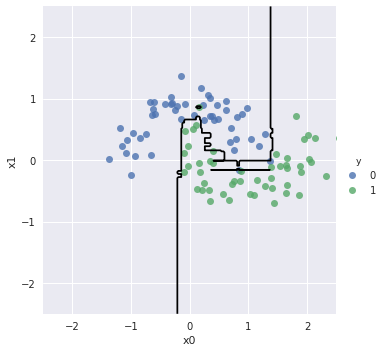

In [20]:
plot_scatter(mins = -2.5, maxs = 2.5)
plot_boundary(classifier, len = 2.5)

___
> ## 결정트리의 계층과 식별 경계

- 결정트리는 판별식이 공간을 직각으로 자르기 때문에 SVM보다는 각져있는 모습을 보임
- 결정트리의 공간을 자르는 과정은 `max_depth`에서 결정
- `max_depth`의 효과를 보기 위해 `n_estimators`는 1로 제한
- 결과는 아래와 같음:

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


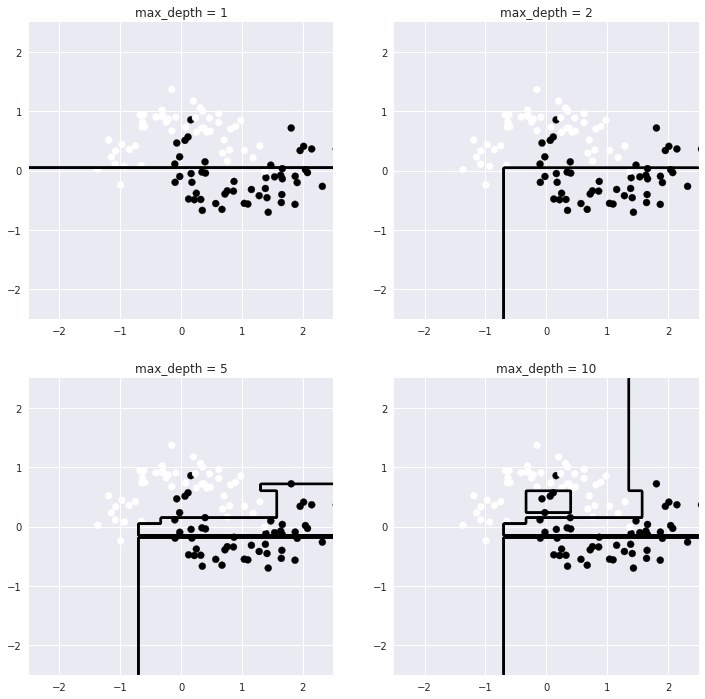

In [34]:
classifier = RandomForestClassifier(random_state = 42, n_estimators = 1)

fig, axs = plt.subplots(2, 2, figsize = (12, 12))
axs = axs.ravel()

xx, yy = np.meshgrid(np.linspace(-2.5, 2.5, 300),
                     np.linspace(-2.5, 2.5, 300))
order = 0
for depth in [1,2,5,10]:
  classifier.max_depth = depth
  classifier.fit(X = X_dataset, y = y_dataset)
  
  axs[order].scatter('x0', 'x1', c = 'y', data = dataset)
  axs[order].set_ylim(-2.5,2.5)
  axs[order].set_xlim(-2.5,2.5)
  
  Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axs[order].contour(xx, yy, Z, colors='k', linestyles=['-'])
  axs[order].set_title('max_depth = %d' % depth)
  order+=1
  

___
> ## 특징량의 중요도

- 랜덤포레스트의 장점 중 하나는 특징량의 중요도 확인이 가능
- 'x0', 'x1' 특징만 가지고는 이해하기 어려우니, 복잡한 데이터 사용
- `sklearn.datasets`모듈의 `load_digits`는 8X8 화소의 손글씨 숫자 이미지 데이터 집합을 가지고 있음

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


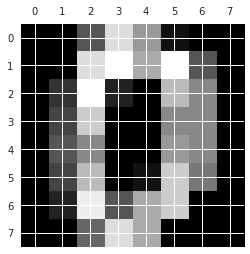

In [38]:
from sklearn.datasets import load_digits

X_dataset, y_dataset = load_digits(return_X_y = True)

print(X_dataset[0])
plt.gray()
plt.matshow(X_dataset[0].reshape(8,8))

- 데이터는 각각 0부터 16까지로 스케일링 되어 있으며 64개의 특징으로 이루어짐
- `X_dataset`은 1764개의 행과 64개의 열로 이루어진 데이터이며, 이를 사용하여 랜덤포레스트 학습이 가능

In [41]:
classifier = RandomForestClassifier(random_state = 42)
classifier.fit(X=X_dataset, y = y_dataset)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

- 학습된 `classifier`에는 `feature_importances_`라는 멤버 변수가 있고, 여기에 특징량의 중요도가 저장되어 있음
- 아래를 참조하면 본 학습 결과에는 21번째 특징이, 0.0597의 중요도를 보이며 판별에 가장 중요한 특징이라 추론 가능

In [58]:
imp_mat = classifier.feature_importances_
print((np.where(imp_mat == max(imp_mat))[0][0], max(imp_mat)))

(21, 0.059712404795379204)


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


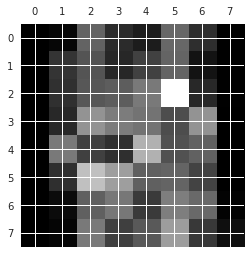

In [61]:
plt.matshow(imp_mat.reshape(8,8))

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


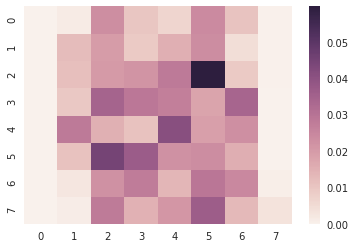

In [60]:
sns.heatmap(imp_mat.reshape(8,8))

- 위 시각화에서 볼 수 있듯이 21번째 특징이 하얀색(짙은 검정)으로 가장 중요하다는 의미를 지님
- 반대로 양쪽 끝의 화소는 검정색(흰색)으로 판별에 큰 의미가 없다고 볼 수 있음
- 이처럼 랜덤 포레스트가 특징량의 중요도를 측정할 때도 사용되므로, 식별 뿐 아니라 데이터 분석에도 종종 사용됨